# imports

In [1]:
%load_ext autoreload
%autoreload 2
packages = !conda list
len(packages),packages

(455,
 ['# packages in environment at /Users/brucecottman/anaconda3:',
  '#',
  '# Name                    Version                   Build  Channel',
  '_anaconda_depends         2019.10                  py37_0  ',
  '_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  ',
  'absl-py                   0.7.0                    pypi_0    pypi',
  'alabaster                 0.7.12                   py37_0  ',
  'altair                    4.0.0                    pypi_0    pypi',
  'anaconda                  custom                   py37_1  ',
  'anaconda-client           1.7.2                    py37_0  ',
  'anaconda-navigator        1.9.6                    py37_0  ',
  'anaconda-project          0.8.2                    py37_0  ',
  'appdirs                   1.4.3                    pypi_0    pypi',
  'appnope                   0.1.0                    py37_0  ',
  'appscript                 1.0.1            py37h1de35cc_1  ',
  'argh                      0.26.2                 

## common imports

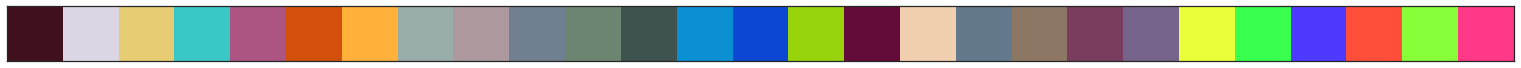

In [2]:
from __future__ import print_function
import matplotlib
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys, os
import io
from typing import Dict, Pattern

import seaborn as sns; sns.set()  # for plot styling
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
PALLET = ['#40111D', '#DCD5E4', '#E7CC74'
                 ,'#39C8C6', '#AC5583', '#D3500C'
                 ,'#FFB139', '#98ADA7', '#AD989E'
                 ,'#708090','#6C8570','#3E534D'

                 ,'#0B8FD3','#0B47D3','#96D30B'                 
                 ,'#630C3A','#F1D0AF','#64788B'                 
                 ,'#8B7764','#7A3C5D','#77648B'
                 ,'#eaff39','#39ff4e','#4e39ff'
                 ,'#ff4e39','#87ff39','#ff3987', ]
N_PALLET = len(PALLET)
sns.set_palette(PALLET)
sns.palplot(PALLET)

## finance imports

In [3]:
#!pip install pandas_datareader #if not already installed 
from pandas import to_datetime, DataFrame
from statistics import stdev
from pandas_datareader.data import DataReader
from math import inf
from pandas_datareader.data import DataReader
import copy
import plotly.express as px

## local imports

In [4]:
# add if you want to add google driveAssertionError
old__file__ = !pwd
__file__ =  old__file__  #!cd ../../NLP ;pwd
#__file__ = !pwd
#__file__ = '/gdrive/My Drive'

sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
__file__

['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src', '/usr/local/Cellar/apache-spark/2.0.1/libexec/python', '/Users/brucecottman/Documents/PROJECTS/FinMrkt/src/$', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/brucecottman/Library/Python/3.7/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions', '/Users/brucecottman/.ipython', ['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']]
/Users/brucecottman/Documents/PROJECTS/FinMrkt/src


['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']

## import from  /PROJECTS/FinMrkt/src/base

In [5]:
from base import FutureValue_, nppy_
from base import return_fit, price_std,  price_std_f
from base import p_or_r_std, p_or_r_std_f, ticket_read
from base import register_DataFrame_method


#  functions

## function  Fed_indexes_corr

In [6]:
def Fed_indexes_corr(Primary_df, Secondary_df, 
                          condition = [-inf, inf],
                          shift__=0, 
                          bottom_year = '1985/1/01',
                          top_year = '1/1/2060'):
                          
    plt.figure(figsize=(12, 8))
    Secondary_df['index']= Secondary_df.index
    Primary_df['index']= Primary_df.index
    # make sure on a loop
    Primary_df[Secondary_df.columns[0]] = 0
    
    Secondary_df = Secondary_df[Primary_df['index'] > bottom_year]
    Primary_df = Primary_df[Primary_df['index'] > bottom_year]
    Secondary_df = Secondary_df[Primary_df['index' ] < top_year]   
    Primary_df = Primary_df[Primary_df['index' ] < top_year]
# condition
    Secondary_df = Secondary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df.shift(shift__)
    
#    1st plot
    ax = sns.lineplot(x='index', y =  Primary_df.columns[0],
                      color='red', linewidth=2.5, data=Primary_df)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# recession bars
    Recessions_plot(ax, bottom_year, top_year)
# 2nd subplot
    ax2 = ax.twinx()
    sns.lineplot(x='index', y=Secondary_df.columns[0], 
                 data=Secondary_df, color='black',
                 linewidth=2.5, ax=ax2)
    if Secondary_df.iloc[0,0] < 99 : ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()
#heatmap
    Primary_df[Secondary_df.columns[0]] = Secondary_df[Secondary_df.columns[0]]
    hm = Primary_df.corr()
    sns.heatmap(hm, annot=True)
    plt.show()
    return hm

# read and plot ticker data

## plot Recession bars 1

In [7]:
def Recessions_plot(ax, start_date, end_date):
    ticker = 'USREC'
    rd_type = 'fred'
    Recession_df = DataReader(ticker, rd_type, 
                            start = start_date, end = end_date) 

    Recession_df['index']= Recession_df.index
    threshold = 0
    ax.fill_between(Recession_df['index'], 0, 1, where=Recession_df[Recession_df.columns[0]] > threshold,
                    color='green', alpha=0.5, transform=ax.get_xaxis_transform())
    return(1)

## plot Fed_indexes_corr

In [8]:
def Fed_indexes_corr(Primary_df, Secondary_df, 
                          condition = [-inf, inf],
                          shift__=0, 
                          bottom_year = '1/1/1960',
                          top_year = '1/1/2060'):
                          
    plt.figure(figsize=(12, 8))
    Secondary_df['index']= Secondary_df.index
    Primary_df['index']= Primary_df.index
    # make sure on a loop
    Primary_df[Secondary_df.columns[0]] = 0
    
    Secondary_df = Secondary_df[Primary_df['index'] > bottom_year]
    Primary_df = Primary_df[Primary_df['index'] > bottom_year]
    Secondary_df = Secondary_df[Primary_df['index' ] < top_year]   
    Primary_df = Primary_df[Primary_df['index' ] < top_year]
# condition
    Secondary_df = Secondary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df.shift(shift__)
    
#    1st plot
    ax = sns.lineplot(x='index', y =  Primary_df.columns[0],
                      color='red', linewidth=2.5, data=Primary_df)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# recession bars
    Recessions_plot(ax, bottom_year, top_year)
# 2nd subplot
    ax2 = ax.twinx()
    sns.lineplot(x='index', y=Secondary_df.columns[0], 
                 data=Secondary_df, color='black',
                 linewidth=2.5, ax=ax2)
    if Secondary_df.iloc[0,0] < 99 : ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()
#heatmap
    Primary_df[Secondary_df.columns[0]] = Secondary_df[Secondary_df.columns[0]]
    hm = Primary_df.corr()
    sns.heatmap(hm, annot=True)
    plt.show()
    return hm

## plot Recession bars 2

In [9]:
def plotbars_df(ax, ticker_df, fx_size=15, fy_size=8, color_ = 'green', threshold = -inf):
    plt.figure(figsize=(fx_size, fy_size))
    ticker_df['index']= ticker_df.index
    ax = sns.lineplot(x='index', y=ticker_df.columns[0], data=ticker_df,color="black", linewidth=2.5)


    ax.fill_between(ticker_df['index'], 0, 1, where=ticker_df[ticker_df.columns[0]] > threshold,
                    color=color_, alpha=0.5, transform=ax.get_xaxis_transform())

## plot ticker_data

In [10]:
def plot_ticker_data(ticker_df, fx_size=15, fy_size=8, color_ = 'black', 
                     plot_rec=True,  
                     start_date = '1985/1/01', end_date = '2022/07/30' ):
    plt.figure(figsize=(fx_size, fy_size))

    sns.set_theme(style="whitegrid")
    ax=sns.lineplot(data=ticker_df, color = color_, linewidth=2.5)
    Recessions_plot(ax, start_date, end_date)
    return(ticker_df)

## correlation

In [11]:
def index_correlation(Primary_df,Secondary_df, ):
#    Primary_df= Primary_df[Primary_df.columns[0]]
    Primary_df.index = Primary_df.index.to_period('M').to_timestamp('M') # monthend
    Secondary_df.index = Secondary_df.index.to_period('M').to_timestamp('M') # monthend
#    Primary_df[Secondary_df.columns[0]] = Secondary_df[Secondary_df.columns[0]]
    Primary_df = Primary_df.merge(Secondary_df, left_on='DATE', right_index=True).reset_index()
    hm = Primary_df.corr()
    sns.heatmap(hm, annot=True)
    plt.show()
    return hm, Primary_df,Secondary_df

## read ticker

In [12]:
def read_ticker_data(rd_type = 'fred', ticker ='fedfunds',
                   fx_size=15, fy_size=8, color_ = 'black',
                   start_date = '1985/1/01', end_date = '2028/07/30'):

    ticker_df = DataReader(ticker, rd_type, 
                           start = start_date, end = end_date)
    return(ticker_df)

## groupby 12-month

In [13]:
def groupby_month(data_df):
    data_c_df =data_df.groupby(pd.Grouper(freq='M')).count()
    data_df = data_df.groupby(pd.Grouper(freq='M')).sum()/data_c_df
    return(data_df, data_c_df)

## rolling  12-month

In [14]:
def rolling_12_month(data_df):
    window = 12
    center_=False
    axis_ = 0
    closed_ = 'neither'
    data_df[data_df.columns[0]] = data_df[data_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window
    return(data_df)

In [15]:
def read_FED_Rate(start_date = '1985/1/01',
                    end_date = '2022/07/30'):
    FED_Rate_df = read_ticker_data() #defaults are FRED CPI
    return(FED_Rate_df) 

In [16]:
def read_CPI(start_date = '1985/1/01',
                end_date = '2022/07/30'):
    CPI_df = read_ticker_data(rd_type = 'fred', ticker ='MEDCPIM158SFRBCLE')
    return(CPI_df) 

## retrieve Recession data

In [17]:
def read_Recession(start_date = '1985/1/01',
                    end_date = '2022/07/30'):
    Recsession_df = read_ticker_data(rd_type = 'fred', ticker ='USREC')
    return(Recsession_df) 

## retrieve Fed rate

(         fedfunds
 count  451.000000
 mean     3.360554
 std      2.814692
 min      0.050000
 25%      0.370000
 50%      3.030000
 75%      5.520000
 max      9.850000,
             fedfunds
 DATE                
 1985-01-01      8.35
 1985-02-01      8.50
 1985-03-01      8.58
 1985-04-01      8.27
 1985-05-01      7.97,
             fedfunds
 DATE                
 2022-01-01      0.08
 2022-02-01      0.08
 2022-03-01      0.20
 2022-04-01      0.33
 2022-05-01      0.77
 2022-06-01      1.21
 2022-07-01      1.68)

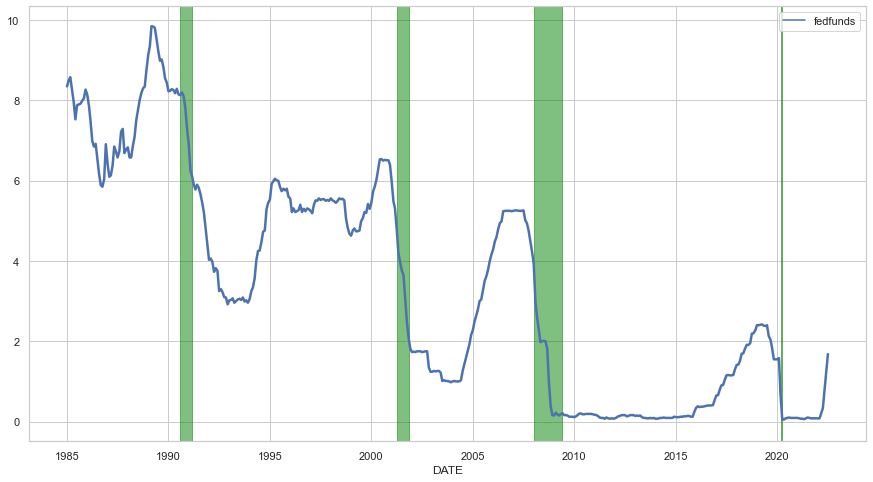

In [18]:
FEDFUNDSRate_df=read_FED_Rate()
plot_ticker_data(FEDFUNDSRate_df, fx_size=15, fy_size=8, color_ = 'black')
FEDFUNDSRate_df.describe(), FEDFUNDSRate_df.head(), FEDFUNDSRate_df.tail(n=7)

## retrieve CPI

(       MEDCPIM158SFRBCLE
 count         450.000000
 mean            2.904248
 std             1.180348
 min            -0.286064
 25%             2.202506
 50%             2.763044
 75%             3.435887
 max             9.130538,
             MEDCPIM158SFRBCLE
 DATE                         
 1985-01-01           3.074903
 1985-02-01           5.603398
 1985-03-01           4.714338
 1985-04-01           4.493616
 1985-05-01           3.307093,
             MEDCPIM158SFRBCLE
 DATE                         
 2022-02-01           6.506399
 2022-03-01           5.902594
 2022-04-01           6.527993
 2022-05-01           7.211770
 2022-06-01           9.130538)

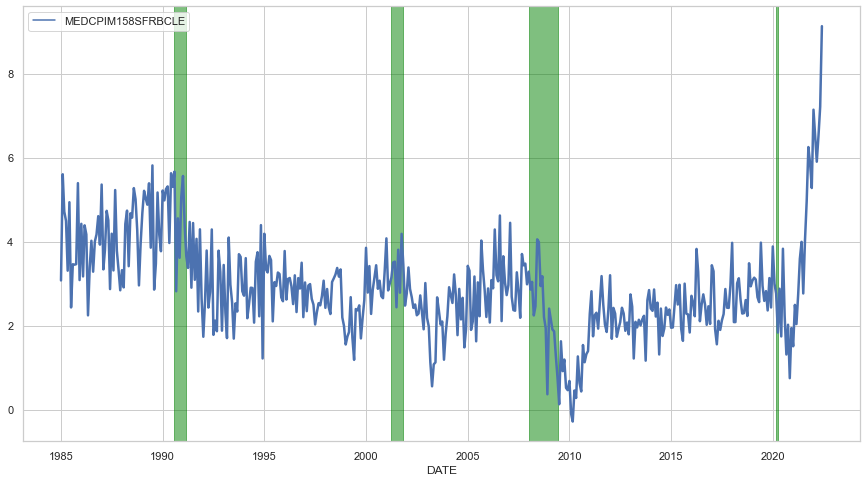

In [19]:
CPI_df=read_CPI()

plot_ticker_data(CPI_df, fx_size=15, fy_size=8, color_ = 'red')
CPI_df.describe(), CPI_df.head(), CPI_df.tail()

## groupby-month rolling CPI

In [20]:
CPI_df=read_CPI()
CPI_df,count=groupby_month(CPI_df)
CPI_df.describe(), CPI_df.head(), CPI_df.tail()


(       MEDCPIM158SFRBCLE
 count         450.000000
 mean            2.904248
 std             1.180348
 min            -0.286064
 25%             2.202506
 50%             2.763044
 75%             3.435887
 max             9.130538,
             MEDCPIM158SFRBCLE
 DATE                         
 1985-01-31           3.074903
 1985-02-28           5.603398
 1985-03-31           4.714338
 1985-04-30           4.493616
 1985-05-31           3.307093,
             MEDCPIM158SFRBCLE
 DATE                         
 2022-02-28           6.506399
 2022-03-31           5.902594
 2022-04-30           6.527993
 2022-05-31           7.211770
 2022-06-30           9.130538)

(       MEDCPIM158SFRBCLE
 count         450.000000
 mean            2.904248
 std             1.180348
 min            -0.286064
 25%             2.202506
 50%             2.763044
 75%             3.435887
 max             9.130538,
             MEDCPIM158SFRBCLE
 DATE                         
 1985-01-31           3.074903
 1985-02-28           5.603398
 1985-03-31           4.714338
 1985-04-30           4.493616
 1985-05-31           3.307093,
             MEDCPIM158SFRBCLE
 DATE                         
 2022-02-28           6.506399
 2022-03-31           5.902594
 2022-04-30           6.527993
 2022-05-31           7.211770
 2022-06-30           9.130538)

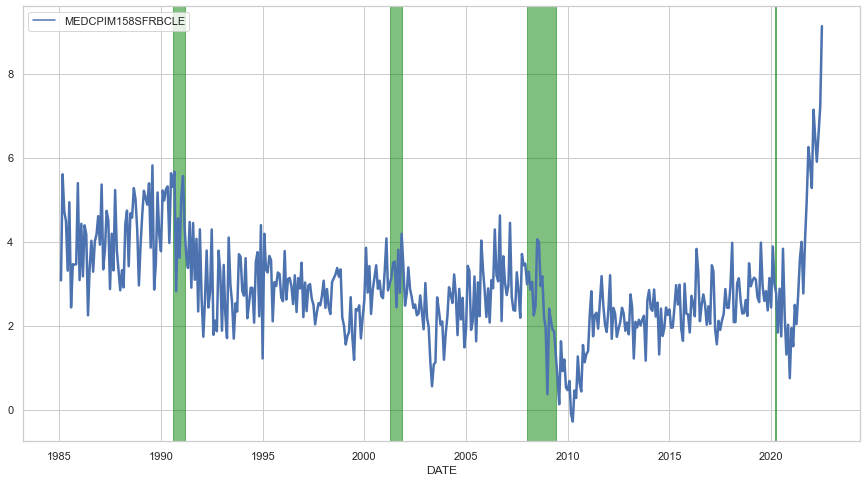

In [21]:
CPI_df=read_CPI()
#CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]
CPI_df, dummy=groupby_month(CPI_df)
plot_ticker_data(CPI_df, fx_size=15, fy_size=8, color_ = 'green')
CPI_df.describe(), CPI_df.head(), CPI_df.tail()

## coor cpi fedrate

In [22]:
CPI_df.columns,FEDFUNDSRate_df.columns

(Index(['MEDCPIM158SFRBCLE'], dtype='object'),
 Index(['fedfunds'], dtype='object'))

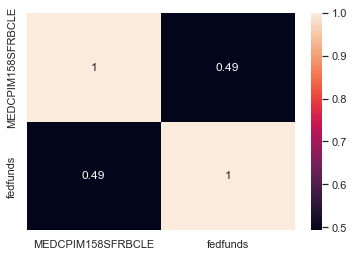

In [23]:
hm,ttp,dummy =index_correlation(CPI_df,FEDFUNDSRate_df)


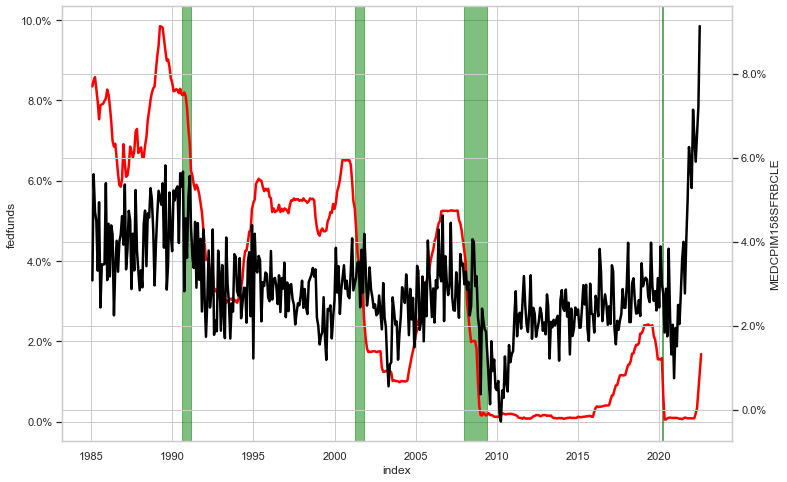

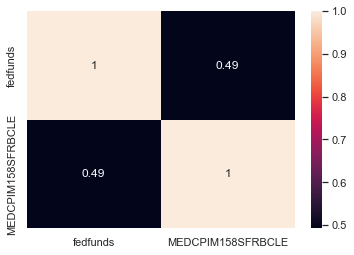

shift: 0    corr: 0.4922787984074044
shift: 0    corr: 0.4922787984074044


In [24]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, CPI_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2027-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## retreive recession

In [25]:
Recession_df = read_Recession()
Recession_df.describe(),Recession_df.head(n=2), Recession_df.tail(n=2)

(            USREC
 count  451.000000
 mean     0.079823
 std      0.271319
 min      0.000000
 25%      0.000000
 50%      0.000000
 75%      0.000000
 max      1.000000,
             USREC
 DATE             
 1985-01-01      0
 1985-02-01      0,
             USREC
 DATE             
 2022-06-01      0
 2022-07-01      0)

In [26]:
def Recessions_plot(ax, start_date, end_date):
    ticker = 'USREC'
    rd_type = 'fred'
    Recession_df = DataReader(ticker, rd_type, 
                            start = start_date, end = end_date) 

    Recession_df['index']= Recession_df.index
    threshold = 0
    ax.fill_between(Recession_df['index'], 0, 1, where=Recession_df[Recession_df.columns[0]] > threshold,
                    color='green', alpha=0.5, transform=ax.get_xaxis_transform())
    return(1)


## Retrieve Brave-Butters-Kelley Cycle Component of GDP 

Earlier this year, a new “big data” activity index was introduced in an Economic Perspectives article.1 This index was constructed from 500 monthly measures of growth in U.S. economic activity and quarterly U.S. real GDP growth. To recap that work, the authors developed what is referred to as a mixed-frequency collapsed dynamic factor model2 that allowed for the estimation of the unobserved monthly evolution of quarterly U.S. real GDP growth based on the variation in a panel of 500 monthly time series. Included in this panel were the coincident, leading, and lagging monthly real activity indicators commonly used to assess the state of the business cycle for the United States. Using this model, the authors then decomposed monthly real GDP growth into three separate components: trend, cycle, and irregular components. The big data activity index represented the cycle component of this decomposition and was shown to have several highly desirable properties, including being 99% accurate in aligning with historical U.S. recessions and expansions as defined by the National Bureau of Economic Research (NBER) since 1960.3

(           BBKMCY
 count  450.000000
 mean    -0.310894
 std      3.135826
 min    -38.771433
 25%     -0.900554
 50%      0.013773
 75%      1.005218
 max     10.715806,
               BBKMCY
 DATE                
 1985-01-31 -0.664751
 1985-02-28  0.183190
 1985-03-31  1.142127
 1985-04-30 -0.195582
 1985-05-31  0.445028,
               BBKMCY
 DATE                
 2022-02-28  0.419364
 2022-03-31  0.836047
 2022-04-30 -0.229555
 2022-05-31 -0.595858
 2022-06-30 -1.000000)

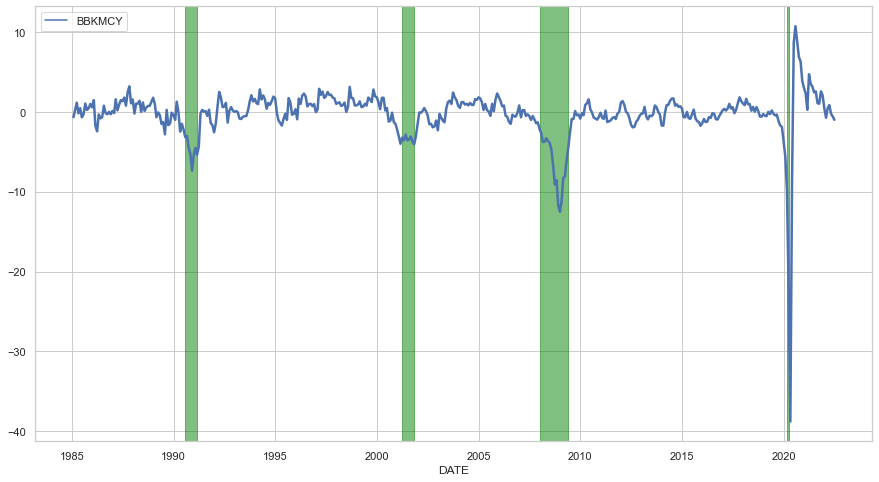

In [27]:
BBKMCY_df=read_ticker_data(ticker='BBKMCY')
BBKMCY_df.loc[pd.to_datetime('2022-06-01')] = [-1.0]
BBKMCY_df,count=groupby_month(BBKMCY_df)

plot_ticker_data(BBKMCY_df, fx_size=15, fy_size=8, color_ = 'green')
BBKMCY_df.describe(), BBKMCY_df.head(), BBKMCY_df.tail()


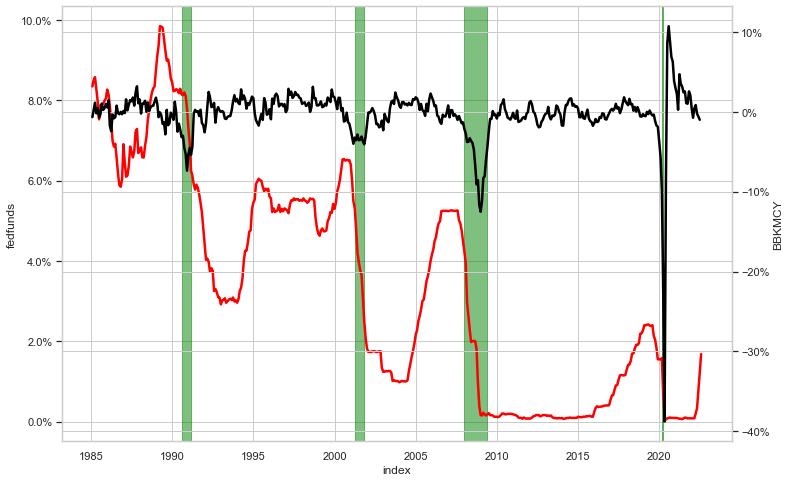

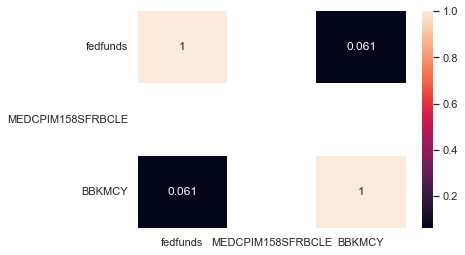

shift: 0    corr: nan
shift: 0    corr: 0.0


In [28]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 6):

    hm=Fed_indexes_corr(FEDFUNDSRate_df, BBKMCY_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2028-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## Retrieve M1 money supply

(               M1SL
 count    450.000000
 mean    2624.232222
 std     4166.315088
 min      557.000000
 25%     1075.150000
 50%     1297.500000
 75%     2474.275000
 max    20699.300000,
              M1SL
 DATE             
 1985-01-31  557.0
 1985-02-28  563.6
 1985-03-31  566.6
 1985-04-30  570.4
 1985-05-31  575.1,
                M1SL
 DATE               
 2022-02-28  20661.3
 2022-03-31  20699.3
 2022-04-30  20615.3
 2022-05-31  20620.7
 2022-06-30  20640.0)

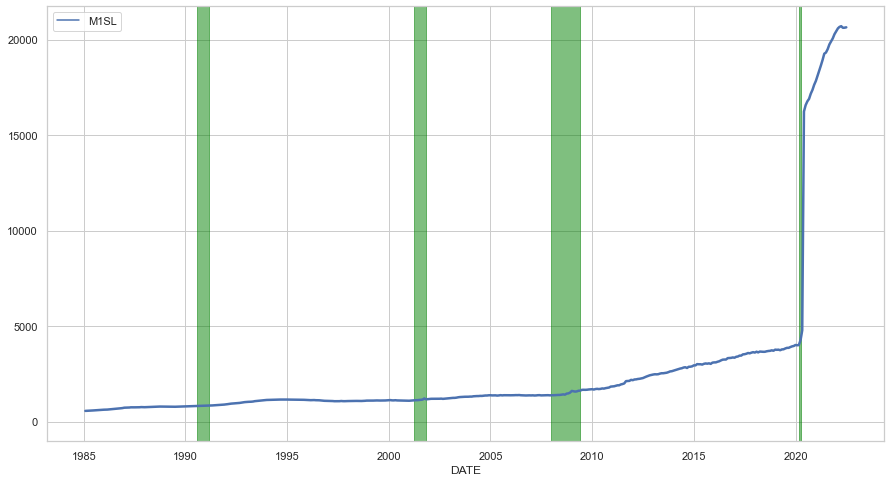

In [29]:
M1_df=read_ticker_data(ticker='M1SL',
                       start_date = '1985/1/01',
                        end_date = '2022/07/30')

M1_df.loc[pd.to_datetime('2022-06-01')] = [20640]
M1_df,count=groupby_month(M1_df)
plot_ticker_data(M1_df, fx_size=15, fy_size=8, color_ = 'green')
M1_df.describe(), M1_df.head(), M1_df.tail()

## Fed rate vs. M1

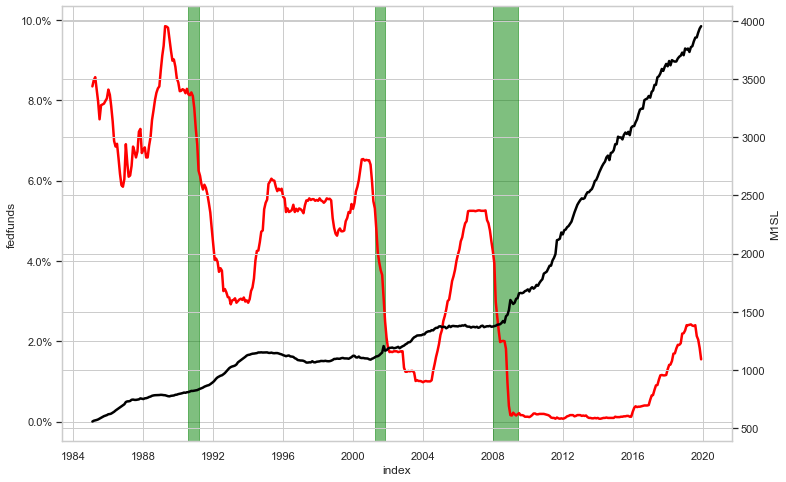

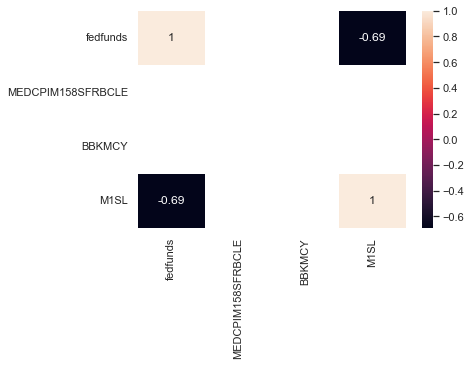

shift: 0    corr: nan
shift: 0    corr: 0.0


In [30]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, M1_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2019-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

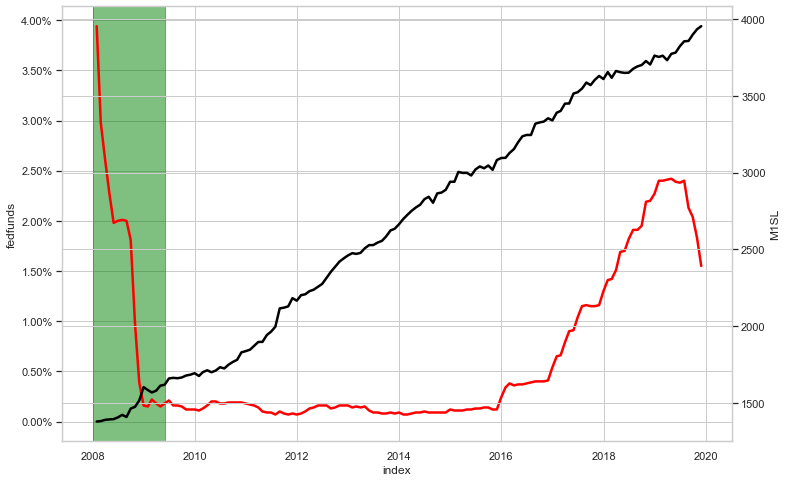

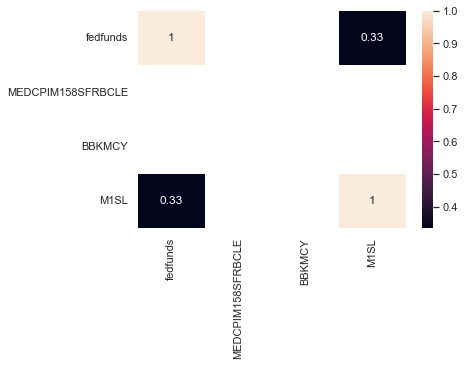

shift: 0    corr: nan
shift: 0    corr: 0.0


In [31]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, M1_df, shift__= sh, 
                            bottom_year='2008-1-01',
                            top_year='2019-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## BBKMCY_df vs M1

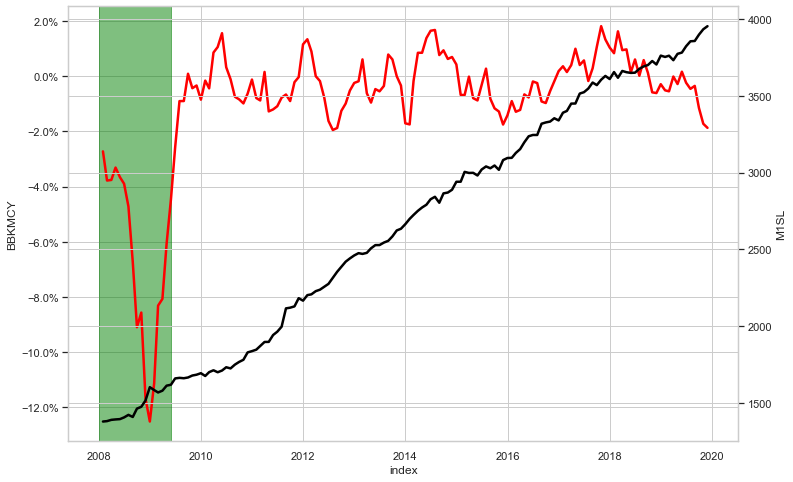

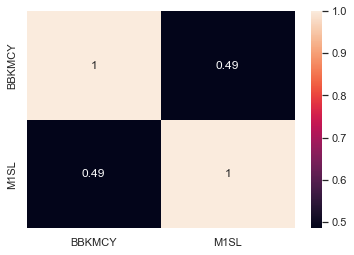

shift: 0    corr: 0.48526899857950734
shift: 0    corr: 0.48526899857950734


In [32]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(BBKMCY_df, M1_df, shift__= sh, 
                            bottom_year='2008-1-01',
                            top_year='2019-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## Retrieve NASDAS composite index IXIC

                    High           Low          Open         Close  \
Date                                                                 
2022-07-27  12081.730469  11718.379883  11756.190430  12032.419922   
2022-07-28  12179.089844  11886.669922  12036.480469  12162.589844   
2022-07-29  12426.259766  12181.129883  12239.690430  12390.690430   
2022-08-01  12499.719727  12271.980469  12317.959961  12368.980469   
2022-08-02  12503.339844  12260.480469  12287.669922  12348.759766   
2022-08-03  12699.639648  12425.209961  12433.870117  12668.160156   
2022-08-04  12736.190430  12600.780273  12675.040039  12720.580078   
2022-08-05  12720.440430  12525.769531  12538.799805  12657.549805   

                Volume     Adj Close  
Date                                  
2022-07-27  4559800000  12032.419922  
2022-07-28  4892770000  12162.589844  
2022-07-29  4893090000  12390.690430  
2022-08-01  4373610000  12368.980469  
2022-08-02  4742630000  12348.759766  
2022-08-03  5628590000  12

(          Adj Close
 count    452.000000
 mean    3063.200064
 std     3264.595437
 min      260.845456
 25%      761.947981
 50%     2072.944377
 75%     3864.097263
 max    15814.932896,
              Adj Close
 Date                  
 1985-01-31  260.845456
 1985-02-28  285.521052
 1985-03-31  280.428574
 1985-04-30  280.895238
 1985-05-31  287.513636,
                Adj Close
 Date                    
 2022-01-31  14531.377490
 2022-02-28  13898.728413
 2022-03-31  13623.262950
 2022-04-30  13394.163037
 2022-05-31  11829.729539
 2022-06-30  11418.919085
 2022-07-31  11622.631543
 2022-08-31  12552.806055)

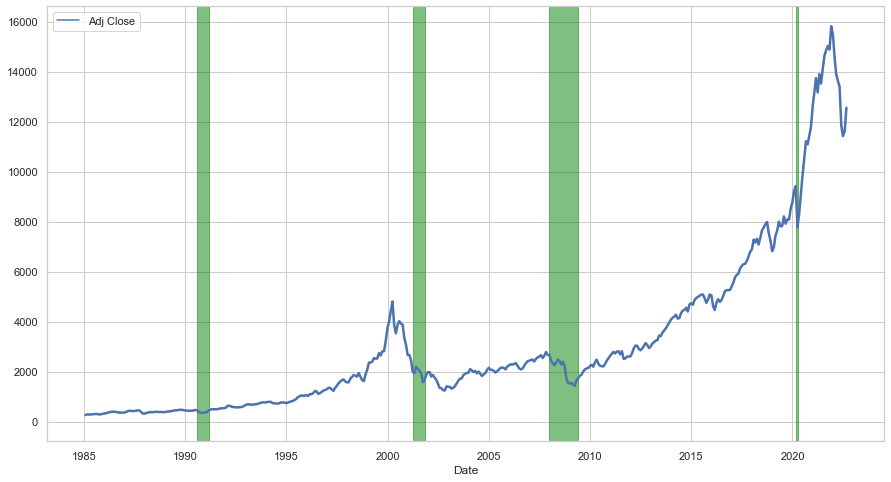

In [33]:
IXIC_df=read_ticker_data(ticker='^IXIC', rd_type='yahoo')
#IXIC_df.loc[pd.to_datetime('2022-07-30')] = [12657]
print(IXIC_df.tail(n=8))
IXIC_df,dummy=groupby_month(IXIC_df)
IXIC_df=rolling_12_month(IXIC_df)
#IXIC_df =  IXIC_df.iloc[:-1] # drop last month if not edof month
IXIC_df.drop(['High', 'Low','Open', 'Close', 'Volume'], axis=1, inplace=True)
plot_ticker_data(IXIC_df, fx_size=15, fy_size=8, color_ = 'green')

IXIC_df.describe(), IXIC_df.head(),  IXIC_df.tail(n=8),

In [33]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, IXIC_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2022-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3552, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/7s/x40lc7k52vg70w0xtdts0w280000gn/T/ipykernel_25397/596779582.py", line 6, in <module>
    top_year='2022-12-01')
  File "/var/folders/7s/x40lc7k52vg70w0xtdts0w280000gn/T/ipykernel_25397/4054876031.py", line 13, in Fed_indexes_corr
    Secondary_df = Secondary_df[Primary_df['index'] > bottom_year]
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py", line 2918, in __getitem__
    return self._getitem_bool_array(key)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py", line 2967, in _getitem_bool_array
    key = check_bool_indexer(self.index, key)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packa

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3552, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/7s/x40lc7k52vg70w0xtdts0w280000gn/T/ipykernel_25397/596779582.py", line 6, in <module>
    top_year='2022-12-01')
  File "/var/folders/7s/x40lc7k52vg70w0xtdts0w280000gn/T/ipykernel_25397/4054876031.py", line 13, in Fed_indexes_corr
    Secondary_df = Secondary_df[Primary_df['index'] > bottom_year]
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py", line 2918, in __getitem__
    return self._getitem_bool_array(key)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py", line 2967, in _getitem_bool_array
    key = check_bool_indexer(self.index, key)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packa

TypeError: object of type 'NoneType' has no len()

<Figure size 864x576 with 0 Axes>

In [34]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 37, 5):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, IXIC_df, shift__= sh, 
                            bottom_year='1996-1-01',
                            top_year='2008-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

ERROR! Session/line number was not unique in database. History logging moved to new session 10028


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

<Figure size 864x576 with 0 Axes>

## M1 vs NASDAQ

In [35]:
M1_df.describe(), IXIC_df.describe() ,M1_df, IXIC_df,

(               M1SL
 count    450.000000
 mean    2624.232222
 std     4166.315088
 min      557.000000
 25%     1075.150000
 50%     1297.500000
 75%     2474.275000
 max    20699.300000,
           Adj Close
 count    452.000000
 mean    3063.200064
 std     3264.595437
 min      260.845456
 25%      761.947981
 50%     2072.944377
 75%     3864.097263
 max    15814.932896,
                M1SL      index
 DATE                          
 1985-01-31    557.0 1985-01-31
 1985-02-28    563.6 1985-02-28
 1985-03-31    566.6 1985-03-31
 1985-04-30    570.4 1985-04-30
 1985-05-31    575.1 1985-05-31
 1985-06-30    582.3 1985-06-30
 1985-07-31    589.1 1985-07-31
 1985-08-31    596.2 1985-08-31
 1985-09-30    603.3 1985-09-30
 1985-10-31    607.8 1985-10-31
 1985-11-30    612.2 1985-11-30
 1985-12-31    619.8 1985-12-31
 1986-01-31    621.4 1986-01-31
 1986-02-28    625.2 1986-02-28
 1986-03-31    633.5 1986-03-31
 1986-04-30    641.0 1986-04-30
 1986-05-31    652.0 1986-05-31
 1986-06-30 

In [ ]:
maxsh = 0
maxcorr = 0.0
 # delete june 
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(M1_df, IXIC_df, shift__= sh, 
                            bottom_year='2006-1-01',
                            top_year='2019-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

In [ ]:
maxsh = 0
maxcorr = 0.0
 # delete june 
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(M1_df, IXIC_df, shift__= sh, 
                            bottom_year='2006-1-01',
                            top_year='2019-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## Fed Rate vs NASDAQ

In [ ]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 37, 5):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, IXIC_df, shift__= sh, 
                            bottom_year='1996-1-01',
                            top_year='2028-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh